In [17]:
# Librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy

In [18]:
# Parámetros iniciales.
stocks = ["HPQ", "INTC", "JNJ", "JPM", "KO", "PFE", "PG", "PYPL", "TSLA", "XOM"]
start_date = "2015-08-01"
end_date = "2022-12-31"
risk_free_ticker = "^IRX"
num_assets = len(stocks)
numberSim = 25000

In [19]:
# Extraer datos activos.
prices_df = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
print(prices_df.head())

[*********************100%***********************]  10 of 10 completed
                  HPQ       INTC        JNJ        JPM         KO        PFE  \
Date                                                                           
2015-08-03  10.682039  23.071062  81.248169  55.055370  32.416645  25.854355   
2015-08-04  10.589522  23.134600  81.069450  54.999123  32.658554  25.825747   
2015-08-05  10.781670  23.318775  81.654320  55.216049  32.869267  25.818542   
2015-08-06  10.724737  23.230694  80.476456  54.830429  32.713188  25.350025   
2015-08-07  10.464984  23.126587  80.297745  54.669746  32.596138  25.364435   

                   PG       PYPL       TSLA        XOM  
Date                                                    
2015-08-03  61.268635  39.389999  17.332666  54.431664  
2015-08-04  60.875683  38.950001  17.752001  53.811066  
2015-08-05  60.763397  39.270000  18.008667  53.811066  
2015-08-06  60.739334  38.849998  16.408667  54.452579  
2015-08-07  60.530838  39.

In [20]:
# Extraer tasa libre de riesgo.
risk_free = yf.Ticker(risk_free_ticker).info["regularMarketPreviousClose"]
risk_free /= 100
print(risk_free)

0.05055


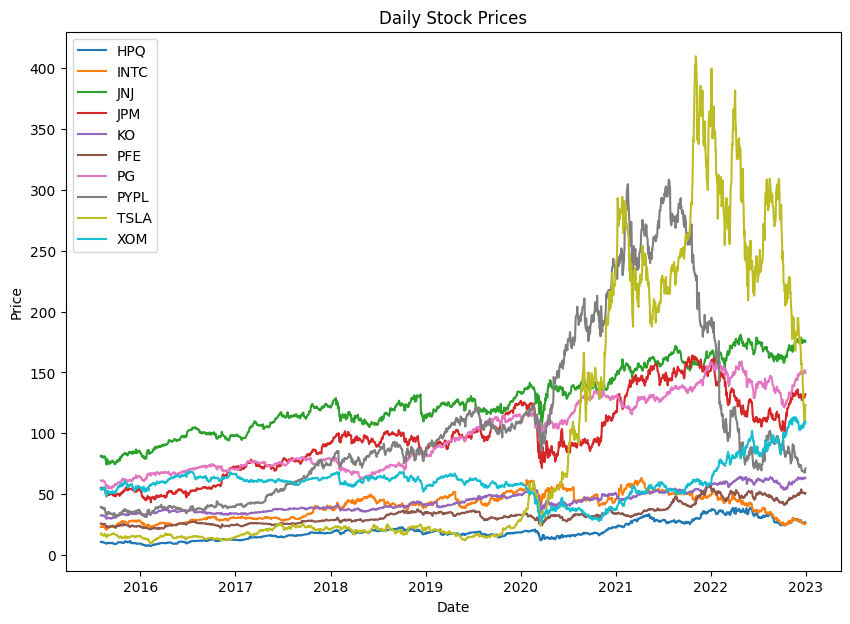

In [21]:
# Gráfica precios.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(prices_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

In [22]:
# Retornos diarios (Comando directo)
returns_df = prices_df.pct_change().dropna()
print(returns_df.head())

# Retornos promedio.
mean_returns = np.array(returns_df.mean())
print(mean_returns)

                 HPQ      INTC       JNJ       JPM        KO       PFE  \
Date                                                                     
2015-08-04 -0.008661  0.002754 -0.002200 -0.001022  0.007462 -0.001107   
2015-08-05  0.018145  0.007961  0.007214  0.003944  0.006452 -0.000279   
2015-08-06 -0.005280 -0.003777 -0.014425 -0.006984 -0.004748 -0.018147   
2015-08-07 -0.024220 -0.004481 -0.002221 -0.002931 -0.003578  0.000568   
2015-08-10  0.028222  0.026316  0.009509  0.012344 -0.002155  0.004831   

                  PG      PYPL      TSLA       XOM  
Date                                                
2015-08-04 -0.006414 -0.011170  0.024193 -0.011401  
2015-08-05 -0.001845  0.008216  0.014458  0.000000  
2015-08-06 -0.000396 -0.010695 -0.088846  0.011922  
2015-08-07 -0.003433  0.007207 -0.014708 -0.016135  
2015-08-10  0.011924 -0.002045 -0.005649  0.024990  
[0.00075056 0.0002862  0.00048275 0.00063668 0.00043022 0.00047315
 0.00055447 0.00061625 0.00171973 0.0005489

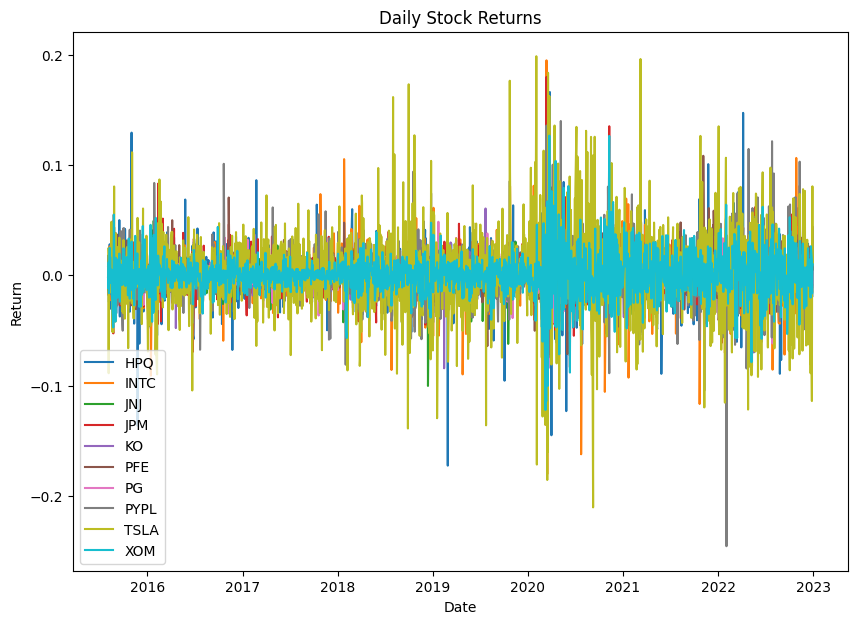

In [23]:
# Gráfica retornos.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(returns_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return')

plt.legend(loc="lower left")
plt.show()

In [24]:
# Inversión individual en los activos.
stocks_return = (1+mean_returns)**(252)-1
stocks_risk = np.std(returns_df)*np.sqrt(252)

indv_all = pd.DataFrame({"Annualized Return" : np.round(stocks_return*100, 2),
                         "Annualized Risk" : np.round(stocks_risk*100, 2)})


print("-"*80)
print("Individual Allocation")
print("\n")
print(indv_all.T)
print("-"*80)

--------------------------------------------------------------------------------
Individual Allocation


                     HPQ   INTC    JNJ    JPM     KO    PFE     PG   PYPL  \
Annualized Return  20.81   7.48  12.93  17.40  11.45  12.66  14.99  16.79   
Annualized Risk    36.13  33.34  18.83  29.12  19.14  23.75  19.58  38.67   

                    TSLA    XOM  
Annualized Return  54.19  14.83  
Annualized Risk    58.11  29.67  
--------------------------------------------------------------------------------


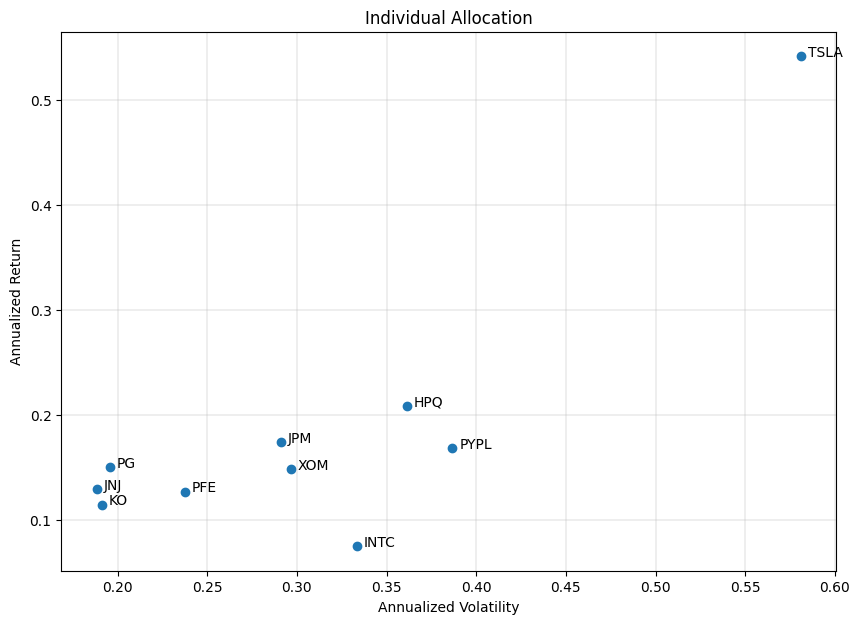

In [25]:
# Gráfica activos individuales y frontera eficiente.
plt.figure(figsize=(10,7))
plt.scatter(stocks_risk, stocks_return)

for i, name in enumerate(stocks):
    plt.annotate(name, (stocks_risk[i], stocks_return[i]), xytext=(5,0), textcoords='offset points')

plt.title('Individual Allocation')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.show()

In [26]:
# Simular portafolios.
weights = pd.DataFrame(np.nan, index=range(numberSim), columns=stocks)

for i in range(numberSim):
  random_numbers = np.array([random.random() for _ in range(returns_df.shape[1])])
  sum_rand_numbers = sum(random_numbers)

  weights.iloc[i,:] = random_numbers/sum_rand_numbers

print(weights)

            HPQ      INTC       JNJ       JPM        KO       PFE        PG  \
0      0.012179  0.166955  0.061956  0.174844  0.180654  0.089945  0.080601   
1      0.092887  0.022227  0.058804  0.145366  0.084893  0.096672  0.113693   
2      0.041719  0.129873  0.150493  0.043133  0.114082  0.142050  0.101776   
3      0.141668  0.139553  0.044564  0.046294  0.135330  0.141540  0.066720   
4      0.140570  0.094704  0.003313  0.093848  0.119183  0.146947  0.060077   
...         ...       ...       ...       ...       ...       ...       ...   
24995  0.136418  0.086558  0.066383  0.133378  0.110696  0.121685  0.122106   
24996  0.079116  0.127798  0.128731  0.048454  0.088397  0.155073  0.054087   
24997  0.034848  0.006946  0.088199  0.098998  0.179123  0.161369  0.106094   
24998  0.020919  0.101136  0.112667  0.096238  0.051088  0.125958  0.072768   
24999  0.125957  0.153063  0.126445  0.080330  0.124171  0.115772  0.008379   

           PYPL      TSLA       XOM  
0      0.1124

In [27]:
# Matriz de Varianza Covarianza.
cov_matrix = np.cov(returns_df, rowvar=False)

# Desviaciones estándar por activo.
stdev_assets = np.sqrt(np.diagonal(cov_matrix))

In [28]:
# Función para calcular rentabilidad de los portafolios (Anual).
def rent_Portfolios_f(weights, mean_returns):
  rtrn1 = np.dot(mean_returns, weights)
  rtrn1 = (1 + rtrn1)**(252)-1
  return rtrn1

# Función para calcular riesgo de los portafolios (Anual).
def risk_Portfolios_f(weights, varcov):
  risk1 = np.dot(weights.T, np.dot(varcov, weights))
  risk1 = np.sqrt(risk1*252)
  return risk1

# Función para calcular Sharpe Ratio.
def sharpe_ratio_f(rent, risk_free, risk):
  sr1 = (rent - risk_free)/risk
  return sr1

In [29]:
# Retornos y riesgo portafolios (Anual).
results_portfolios = pd.DataFrame(np.nan, index=range(numberSim), columns=["Rtrn", "Std Dev", "Sharpe Ratio"])

for i in range(numberSim):
  results_portfolios.iloc[i,0] = rent_Portfolios_f(weights=weights.iloc[i,:], mean_returns=mean_returns)
  results_portfolios.iloc[i,1] = risk_Portfolios_f(weights=weights.iloc[i,:], varcov=cov_matrix)
  results_portfolios.iloc[i,2] = sharpe_ratio_f(rent=results_portfolios.iloc[i,0], risk_free=risk_free, risk=results_portfolios.iloc[i,1])

print(results_portfolios)

           Rtrn   Std Dev  Sharpe Ratio
0      0.144654  0.194521      0.483772
1      0.204915  0.212297      0.727116
2      0.179065  0.199499      0.644191
3      0.178789  0.206026      0.622442
4      0.173482  0.207571      0.592242
...         ...       ...           ...
24995  0.191619  0.205637      0.686010
24996  0.140869  0.195438      0.462135
24997  0.167933  0.183592      0.639370
24998  0.175748  0.203834      0.614215
24999  0.174969  0.206981      0.601111

[25000 rows x 3 columns]


In [30]:
# Portafolio de Mínima Varianza.
min_var_index = np.argmin(results_portfolios["Std Dev"])
min_var_rent = results_portfolios.iloc[min_var_index, 0]
min_var_risk = results_portfolios.iloc[min_var_index, 1]
min_var_sr = results_portfolios.iloc[min_var_index, 2]

# Portafolio de Máxima Eficiencia.
max_sr_index = np.argmax(results_portfolios["Sharpe Ratio"])
max_sr_rent = results_portfolios.iloc[max_sr_index, 0]
max_sr_risk = results_portfolios.iloc[max_sr_index, 1]
max_sr_sr = results_portfolios.iloc[max_sr_index, 2]

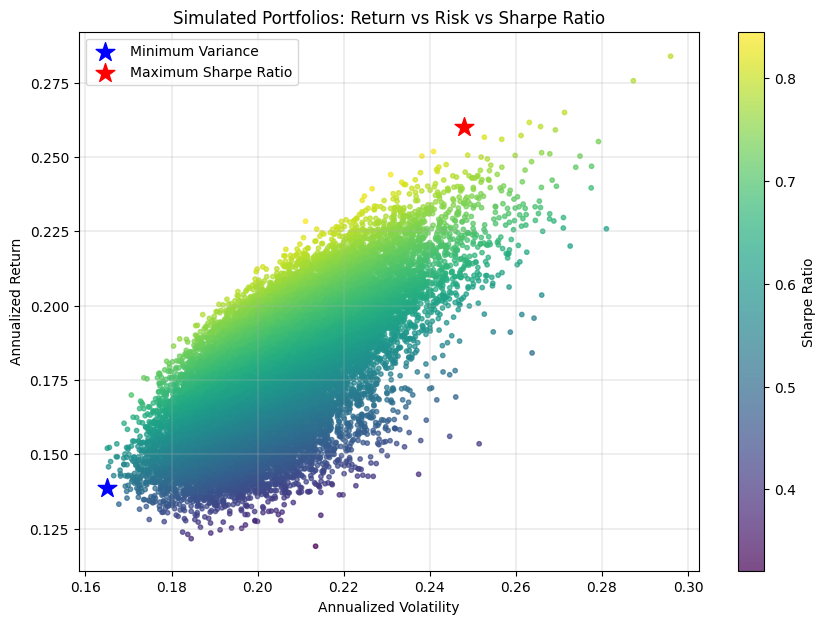

In [32]:
# Gráfica portafolios.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.scatter(min_var_risk, min_var_rent, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk, max_sr_rent, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Simulated Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [33]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr = pd.DataFrame(weights.iloc[min_var_index], index=stocks)
pond_min_vr.columns = ["Allocation"]
pond_min_vr.Allocation = [round(i*100, 2) for i in pond_min_vr.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr, 2)}")
print("\n")
print(pond_min_vr.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr = pd.DataFrame(weights.iloc[max_sr_index], index=stocks)
pond_max_sr.columns = ["Allocation"]
pond_max_sr.Allocation = [round(i*100, 2) for i in pond_max_sr.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr, 2)}")
print("\n")
print(pond_max_sr.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 13.86
Annualized Risk: 16.5
Sharpe Ratio: 0.53


             HPQ  INTC    JNJ   JPM     KO    PFE     PG  PYPL  TSLA   XOM
Allocation  7.43  4.64  15.91  0.72  18.27  19.48  22.91  0.27  0.72  9.65
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 26.01
Annualized Risk: 24.8
Sharpe Ratio: 0.84


             HPQ  INTC   JNJ   JPM    KO   PFE     PG  PYPL   TSLA  XOM
Allocation  9.02  2.79  12.0  0.96  1.93  13.6  18.99  2.89  32.02  5.8
--------------------------------------------------------------------------------


In [34]:
# Minimización de Varianza.
def min_variance_f(varcov):
    number_assets = varcov.shape[0]
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Máximización de Sharpe Ratio.
def max_sharpe_ratio_f(mean_returns, varcov, risk_free):
    
    def auxiliar1(weights, mean_returns, varcov, risk_free):
        a = rent_Portfolios_f(weights=weights, mean_returns=mean_returns)
        b = risk_Portfolios_f(weights=weights, varcov=varcov)
        c = -((a - risk_free)/b)

        return c
    
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (mean_returns, varcov, risk_free)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(auxiliar1, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Calculo Frontera eficiente.
def efficient_frontier_f(mean_returns, varcov, target):
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: rent_Portfolios_f(x, mean_returns) - target},
                   {"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x    


In [41]:
# Portafolio de Mínima Varianza (Optimización).
weights_min_var_clc = min_variance_f(cov_matrix)
min_var_rent_clc = rent_Portfolios_f(weights_min_var_clc, mean_returns)
min_var_risk_clc = risk_Portfolios_f(weights_min_var_clc, cov_matrix)
min_var_sr_clc = sharpe_ratio_f(min_var_rent_clc, risk_free, min_var_risk_clc)

# Portafolio de Máxima Eficiencia (Optimización).
weights_max_sr_clc = max_sharpe_ratio_f(mean_returns, cov_matrix, risk_free)
max_sr_rent_clc = rent_Portfolios_f(weights_max_sr_clc, mean_returns)
max_sr_risk_clc = risk_Portfolios_f(weights_max_sr_clc, cov_matrix)
max_sr_sr_clc = sharpe_ratio_f(max_sr_rent_clc, risk_free, max_sr_risk_clc)

# Frontera eficiente.
rent_targets = np.linspace(min_var_rent_clc, np.max(results_portfolios['Std Dev']), 100)

frontier_rent_clc = []
frontier_risk_clc = []
for i in rent_targets:
    weights_clc = efficient_frontier_f(mean_returns, cov_matrix, i)
    frontier_rent_clc.append(rent_Portfolios_f(weights_clc, mean_returns))
    frontier_risk_clc.append(risk_Portfolios_f(weights_clc, cov_matrix))

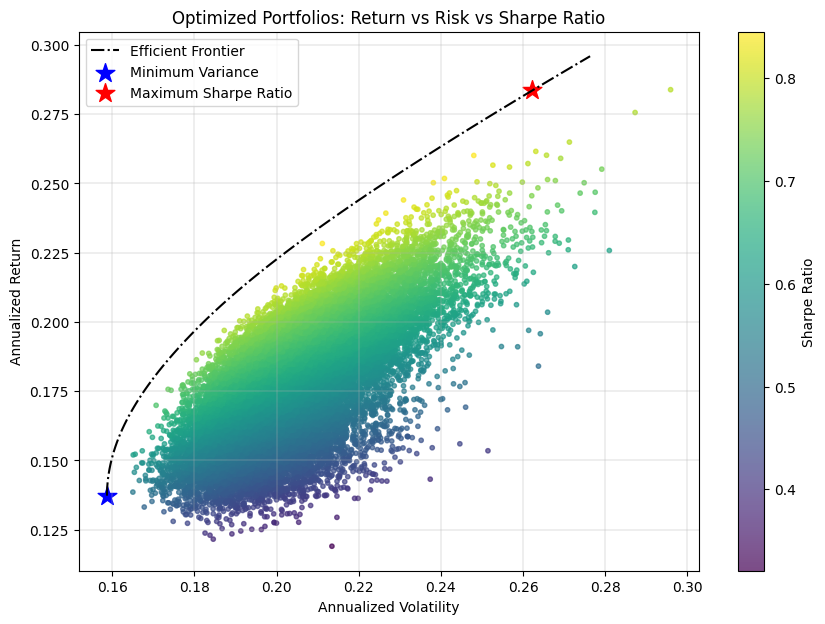

In [42]:
# Gráfica portafolios y frontera eficiente.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.plot(frontier_risk_clc, frontier_rent_clc, linestyle = "-.", color = "black", label = "Efficient Frontier")

plt.scatter(min_var_risk_clc, min_var_rent_clc, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk_clc, max_sr_rent_clc, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Optimized Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [43]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr_clc = pd.DataFrame(weights_min_var_clc, index=stocks)
pond_min_vr_clc.columns = ["Allocation"]
pond_min_vr_clc.Allocation = [round(i*100, 2) for i in pond_min_vr_clc.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr_clc, 2)}")
print("\n")
print(pond_min_vr_clc.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr_clc = pd.DataFrame(weights_max_sr_clc, index=stocks)
pond_max_sr_clc.columns = ["Allocation"]
pond_max_sr_clc.Allocation = [round(i*100, 2) for i in pond_max_sr_clc.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr_clc, 2)}")
print("\n")
print(pond_max_sr_clc.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 13.73
Annualized Risk: 15.87
Sharpe Ratio: 0.55


            HPQ  INTC    JNJ  JPM     KO    PFE     PG  PYPL  TSLA  XOM
Allocation  0.0   0.0  30.44  0.0  25.86  11.36  22.55  1.58  1.61  6.6
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 28.36
Annualized Risk: 26.23
Sharpe Ratio: 0.89


             HPQ  INTC   JNJ   JPM   KO  PFE     PG  PYPL   TSLA   XOM
Allocation  7.41   0.0  7.99  3.15  0.0  0.0  44.59   0.0  36.51  0.34
--------------------------------------------------------------------------------


In [ ]:
# Juan David Rincón, Mayo 2023.